To use the CCI ODP Data Store in a Jupyter Notebook, we need to execute the following lines:

In [1]:
%matplotlib inline
import nest_asyncio
nest_asyncio.apply()

In [2]:
from xcube.core.store.store import find_data_store_extensions
from xcube.core.store.store import get_data_store_params_schema
from xcube.core.store.store import new_data_store
from IPython.display import JSON

Which data accessors are available?

In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

Usually we need more information to get the actual data store object. Which data store parameters are available?

In [4]:
get_data_store_params_schema('cciodp')

Just provide mandatory parameters to instantiate the store class:

In [5]:
store = new_data_store('cciodp')
store

Which datasets are provided? (the list may contain both gridded and vector datasets):

In [6]:
JSON(list(store.get_data_ids()))

<IPython.core.display.JSON object>

Which in-memory data types are provided?

- `dataset` --> `xarray.Dataset` (Gridded data, multi-resolution pyramid)
- `mldataset` -->  `xcube.core.mlds.MultiLevelDataset`  (Gridded data, multi-resolution pyramid)
- `geodataframe` --> `geopandas.GeoDataFrame` (Vector data) 


In [7]:
store.get_type_ids()

'dataset'

We may ask for a specific type of data ...

In [8]:
store.has_data('esacci.OC.5-days.L3S.CHLOR_A.multi-sensor.multi-platform.MERGED.3-1.geographic')

True

... but in many cases we want to query for certain criteria. How can we do that?

In [9]:
store.get_search_params_schema()

Now search.

In [18]:
iterator = store.search_data(ecv='OZONE', frequency='month')
res_list = []
while True:
    try:
        res_list.append(next(iterator).to_dict())
    except StopIteration:
        break
JSON(res_list)

<IPython.core.display.JSON object>

Which parameters must I pass or are available to open the dataset?

In [19]:
store.get_open_data_params_schema('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1')

There are 4 required parameters, so we need to provide them to open a dataset:

In [22]:
dataset = store.open_data(
    'esacci.OZONE.month.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1', 
    var_names=['surface_pressure', 'O3_du', 'O3_du_tot'],
    time_range=['2008-01-01','2008-12-10'])
dataset

<xarray.Dataset>
Dimensions:           (air_pressure: 17, bnds: 2, lat: 180, layers: 16, lon: 360, time: 12)
Coordinates:
  * air_pressure      (air_pressure) float64 1.013e+03 446.0 196.4 ... 0.05 0.01
  * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * layers            (layers) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * lon               (lon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time              (time) datetime64[ns] 2008-01-16T11:59:59 ... 2008-12-16T11:59:59
    time_bnds         (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    O3_du             (time, layers, lat, lon) float32 dask.array<chunksize=(1, 8, 180, 360), meta=np.ndarray>
    O3_du_tot         (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    surface_pressure  (time, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.OZONE.month.L3.NP.multi-sensor.multi-plat...
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...
    date_created:            2020-06-16T22:06:34.611369
    processing_level:        L3
    time_coverage_start:     2008-01-01T00:00:00
    time_coverage_end:       2008-12-31T23:59:59
    time_coverage_duration:  P365DT23H59M59S

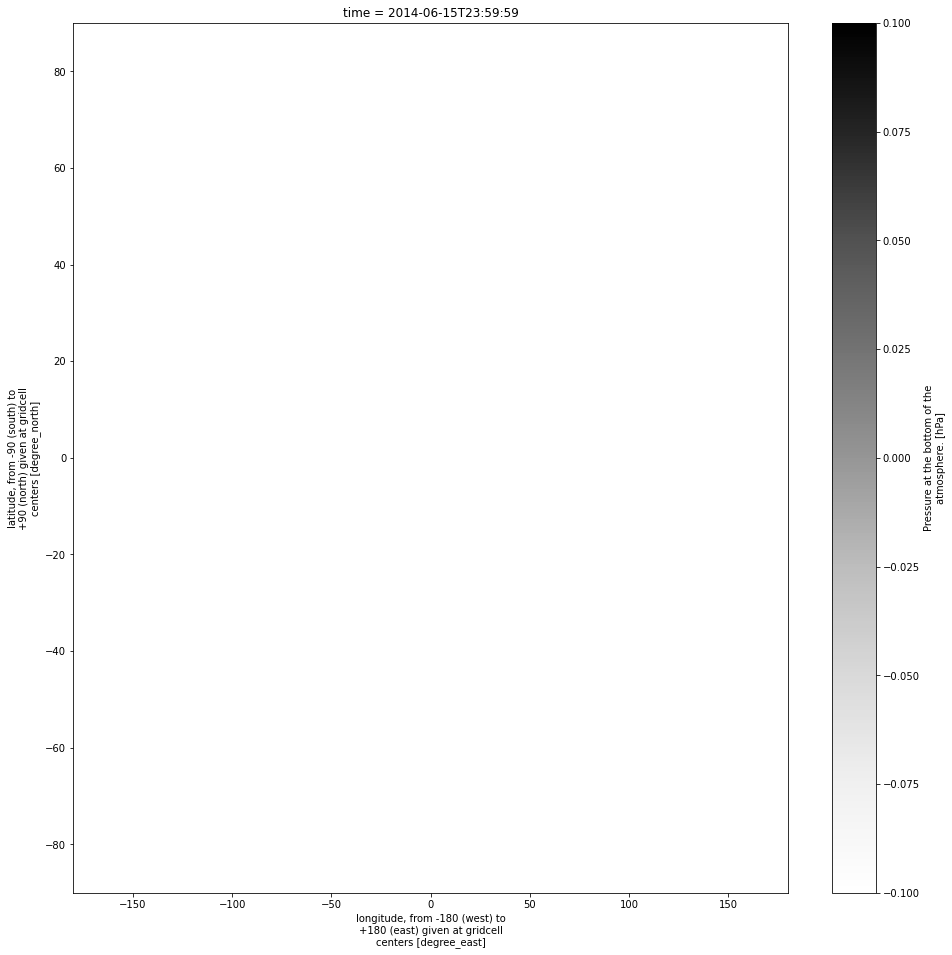

In [21]:
dataset.surface_pressure.isel(time=1).plot.imshow(cmap='Greys', figsize=(16, 16))